# Denoising MRI images

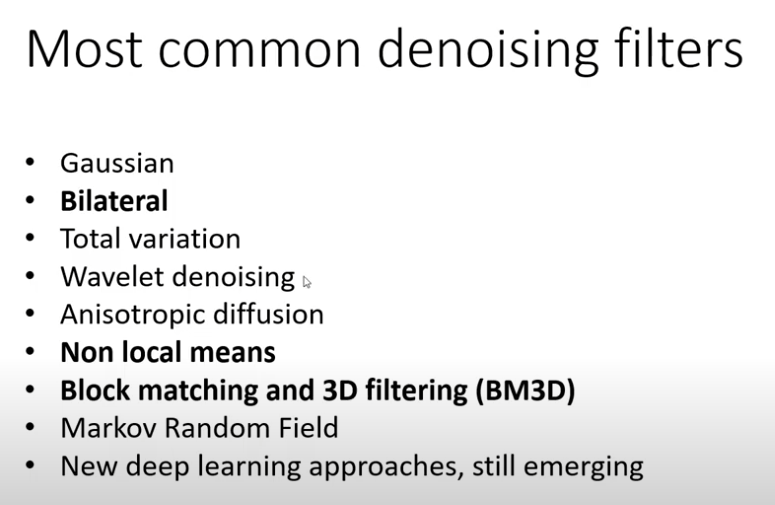

Import the packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io 
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
import scipy
from scipy import ndimage as nd
import cv2

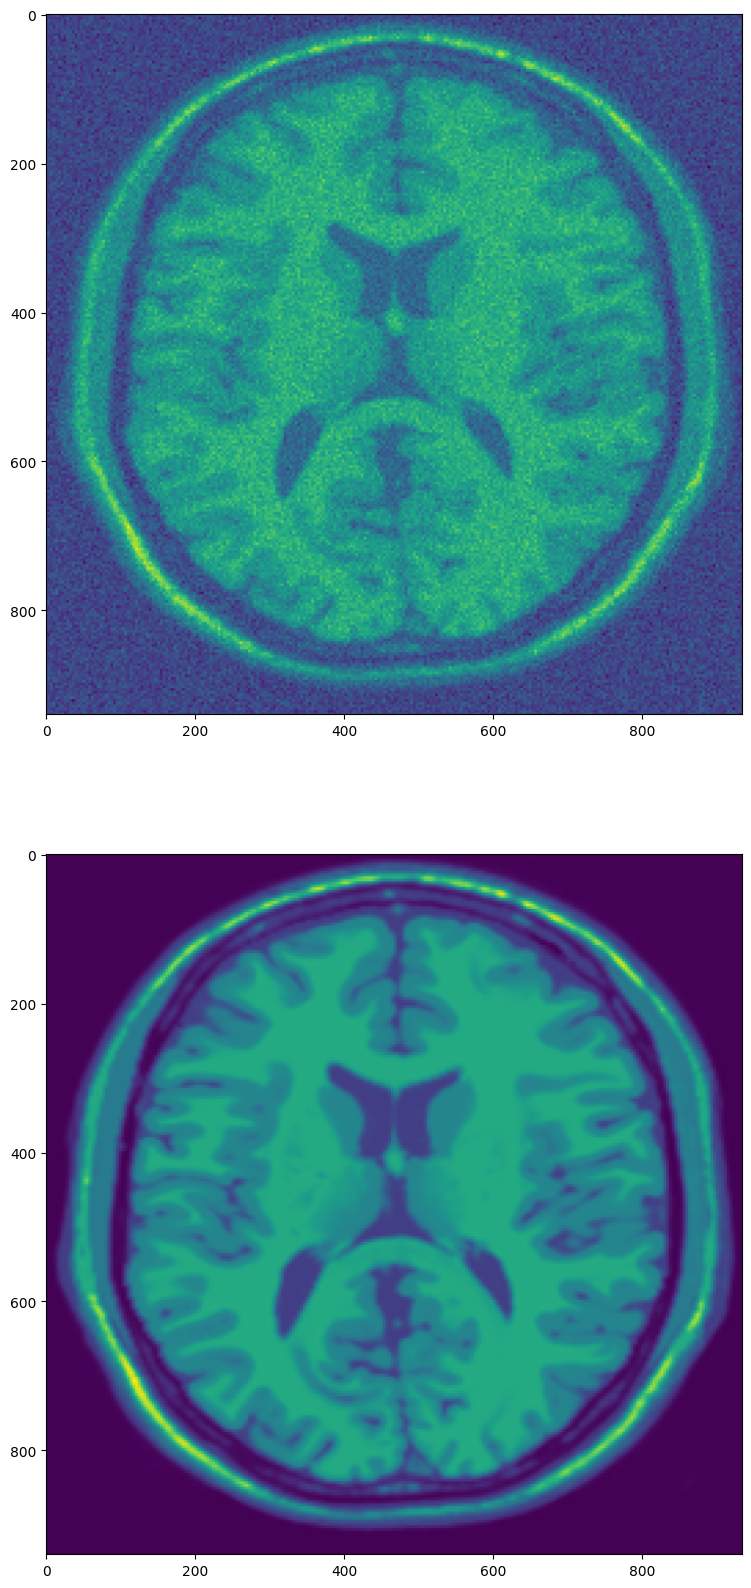

In [2]:
img_path = './images/MRI_images/MRI_noisy.tif'
img_ref_path = './images/MRI_images/MRI_clean.tif'
img_noise = img_as_float(io.imread(img_path))
img_ref = img_as_float(io.imread(img_ref_path))
fig, axis = plt.subplots(2,1, figsize=(20,20))
axis[0].imshow(img_noise)
axis[1].imshow(img_ref)

## Using Gaussian filter

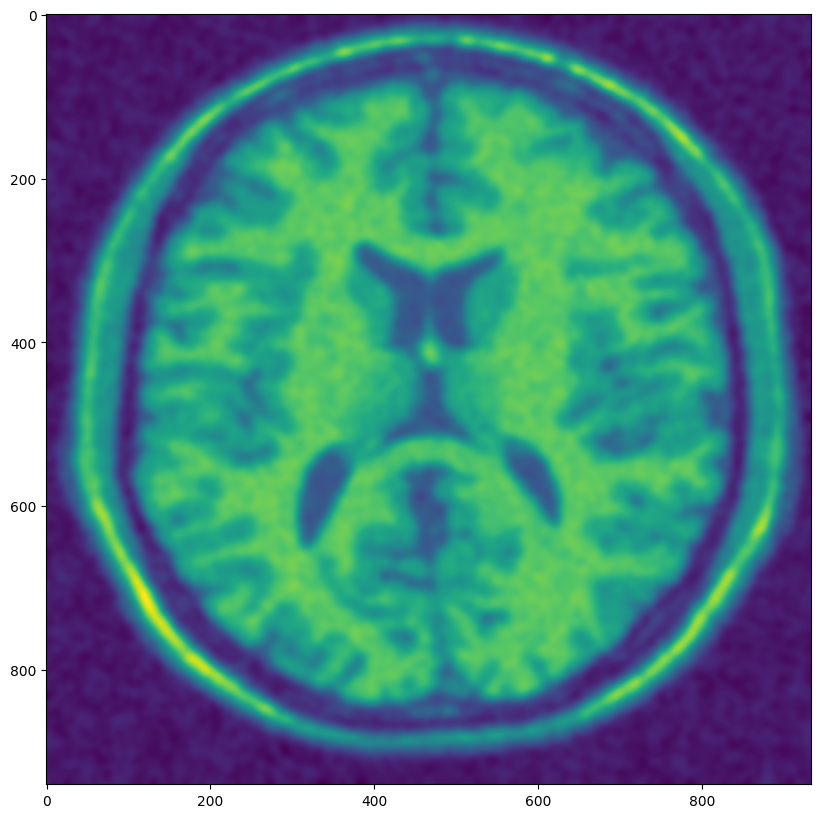

In [3]:
gaussian_img = nd.gaussian_filter(img_noise, sigma=5)
plt.figure(figsize=(10,10))
plt.imshow(gaussian_img, )

the image is denoised, it is clean, but it is blurred

check the peak signal noise ratio, compared between the noise image, and the Gaussian filtered image

In [4]:
noise_psnr = peak_signal_noise_ratio(img_ref, img_noise)
gaussian_psnr = peak_signal_noise_ratio(img_ref, gaussian_img)

print("The peak signal to noise ratio of the noisy image: {:.3f}, \nthe PSNR for the Gaussian denoised image: {:.3f}".
      format(noise_psnr,gaussian_psnr))

The peak signal to noise ratio of the noisy image: 17.038, 
the PSNR for the Gaussian denoised image: 17.112


## Scikit image denoising 

https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html

Bilaterial image denoise, one filter is important for this application is total variation filter.

### A bilateral filter is an edge-preserving and noise reducing filter. It averages pixels based on their spatial closeness and radiometric similarity.

In [5]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma)

In [6]:
img_bilateral = denoise_bilateral(img_noise, sigma_spatial=10, multichannel=False)
bilateral_psnr = peak_signal_noise_ratio(img_ref, img_bilateral)
print("PSNR of bilateral is {:.3f}".format(bilateral_psnr))

/tmp/ipykernel_5501/759565109.py:1: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_bilateral = denoise_bilateral(img_noise, sigma_spatial=10, multichannel=False)


PSNR of bilateral is 16.588


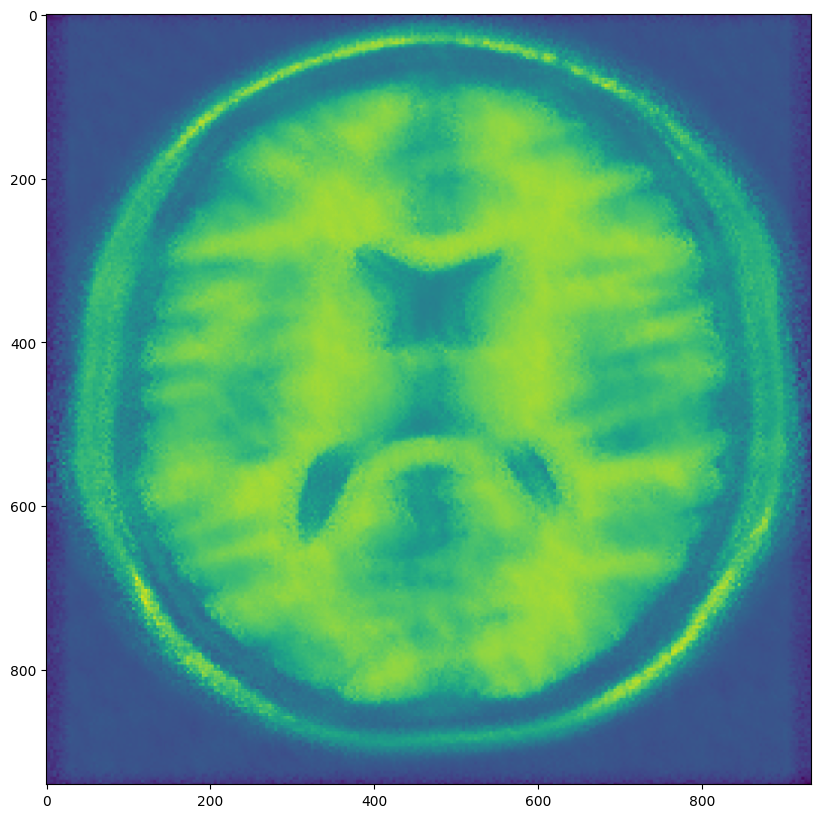

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(img_bilateral)